# Titanic Survival Prediction Using Decision Tree

<h3> Loading Packages and Data </h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Titanic-Data.csv')

<h3> Exploratory Data Analysis </h3>

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We are asked to work on **'Pclass' , 'Sex' , 'Age' , 'Fare'** features only, So i will drop any other features

In [4]:
columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
df.drop(columns = columns, inplace = True)

In [5]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


Check Null Values

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

<Axes: >

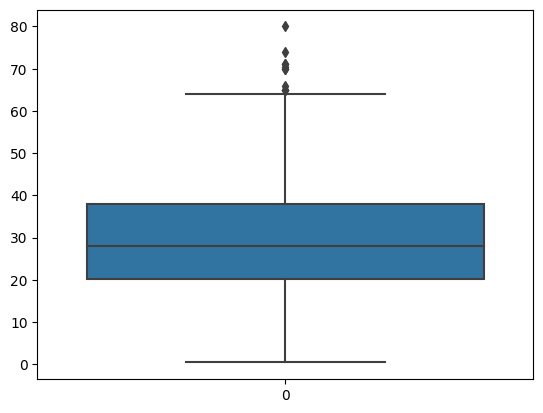

In [7]:
sns.boxplot(df['Age'])

age feature has outliers so will not fill its null values with the mean, we will fill its null values with the **median**

In [8]:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

Mapping Categorical Values

In [10]:
mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(mapping)

In [11]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
888,0,3,1,28.0,23.4500
889,1,1,0,26.0,30.0000


In [12]:
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df['Fare'].to_numpy().reshape(-1, 1))
df['Age'] = scaler.fit_transform(df['Age'].to_numpy().reshape(-1, 1))

In [13]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,-0.565736,-0.502445
1,1,1,1,0.663861,0.786845
2,1,3,1,-0.258337,-0.488854
3,1,1,1,0.433312,0.420730
4,0,3,0,0.433312,-0.486337
...,...,...,...,...,...
886,0,2,0,-0.181487,-0.386671
887,1,1,1,-0.796286,-0.044381
888,0,3,1,-0.104637,-0.176263
889,1,1,0,-0.258337,-0.044381


<Axes: >

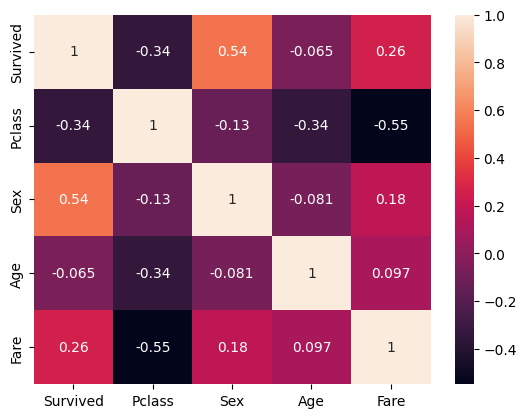

In [14]:
sns.heatmap(df.corr(), annot=True)

<h3> Modeling </h3>

Spliting The Dataset

In [15]:
y = df.Survived
x = df.drop(columns = ['Survived'])

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 22)

Applying Decition Tree Model

In [17]:
model_dec_tree = DecisionTreeClassifier()
model_dec_tree.fit(xtrain, ytrain)
ypred = model_dec_tree.predict(xtest)

Evaluate The Model

In [18]:
print(classification_report(ytest, ypred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       110
           1       0.70      0.80      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



**Tunning The Model**

In [19]:
model_dec_tree = DecisionTreeClassifier(max_depth=8)
model_dec_tree.fit(xtrain, ytrain)
ypred = model_dec_tree.predict(xtest)

In [20]:
print(classification_report(ytest, ypred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

